In [1]:
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path

In [2]:
mx.random.seed(0)
np.random.seed(0)

In [3]:
df = pd.read_csv(r'..\data\raw\Modelar_UH2022.txt', sep='|')

In [4]:
df

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10,369356,0.0,28,0.0
...,...,...,...,...,...,...
21404823,2749,2019-10-11 06:27:14,164505,0.0,0,0.0
21404824,2756,2019-04-06 05:50:17,349758,0.0,0,0.0
21404825,2756,2019-04-06 07:50:17,349770,0.0,12,0.0
21404826,2756,2019-04-06 04:50:17,349758,0.0,0,0.0


In [5]:
df['SAMPLETIME'] = pd.to_datetime(df['SAMPLETIME']).round('H')

In [6]:
df1 = df.pivot_table(values='DELTAINTEGER', index='ID', columns='SAMPLETIME')

In [7]:
df1

SAMPLETIME,2019-02-01 00:00:00,2019-02-01 01:00:00,2019-02-01 02:00:00,2019-02-01 03:00:00,2019-02-01 04:00:00,2019-02-01 05:00:00,2019-02-01 06:00:00,2019-02-01 07:00:00,2019-02-01 08:00:00,2019-02-01 09:00:00,...,2020-01-31 15:00:00,2020-01-31 16:00:00,2020-01-31 17:00:00,2020-01-31 18:00:00,2020-01-31 19:00:00,2020-01-31 20:00:00,2020-01-31 21:00:00,2020-01-31 22:00:00,2020-01-31 23:00:00,2020-02-01 00:00:00
ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,36.0,...,3.0,91.0,36.0,0.0,3.0,10.0,1.0,9.0,5.0,NaN
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,NaN
3,NaN,37.0,0.0,0.0,0.0,5.0,80.0,0.0,0.0,9.0,...,0.0,18.0,8.0,7.0,39.0,33.0,39.0,6.0,30.0,2.0
4,NaN,14.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,10.0,...,12.0,NaN,12.0,3.0,9.0,3.0,37.0,2.0,4.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from gluonts.dataset.common import ListDataset

prediction_length = 24*7
freq = "1H"
start = pd.Timestamp("01-02-2019", freq=freq)

train_ds = ListDataset([{'target': x, 'start': start} for x in df1.values[:, :-prediction_length]], freq=freq)

test_ds = ListDataset([{'target': x, 'start': start} for x in df1.values], freq=freq)

C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  """


In [9]:
train_entry = next(iter(train_ds))

test_entry = next(iter(test_ds))
test_entry.keys()

C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\dataset\common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\dataset\common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\dataset\common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\dataset\common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq


dict_keys(['target', 'start', 'source'])

C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\dataset\util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


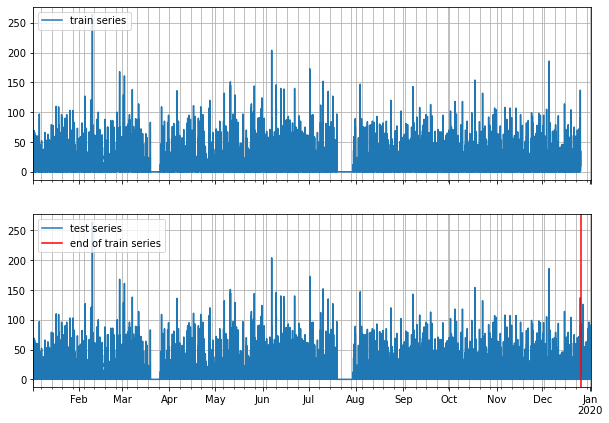

In [10]:
from gluonts.dataset.util import to_pandas

test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [ ]:
from gluonts.model.seq2seq import MQCNNEstimator
from gluonts.mx import Trainer

estimator = MQCNNEstimator(
    freq=freq,
    prediction_length=prediction_length,
    context_length=2*prediction_length,    
    trainer=Trainer(
        ctx="cpu",
        epochs=1,
        learning_rate=1e-3,
        hybridize=False,
        num_batches_per_epoch=100
    )
)

#start training
predictor = estimator.train(train_ds)

In [ ]:
from pathlib import Path

predictor.serialize(Path("../models/mqcnn1"))

In [11]:
# loads it back
from gluonts.model.predictor import Predictor
predictor = Predictor.deserialize(Path("../models/mqcnn1"))

In [12]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [13]:
forecasts = list(forecast_it)
tss = list(ts_it)

C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\transform\split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\transform\feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\model\forecast.py:507: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  self.start_date = pd.Timestamp(start_date, freq=freq)


In [14]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

AttributeError: 'Line2D' object has no property 'prediction_intervals'

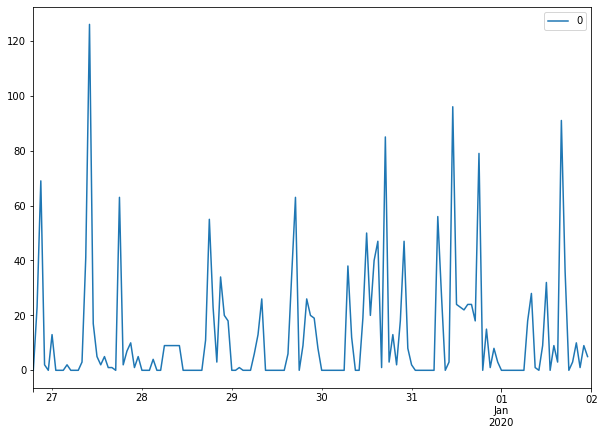

In [15]:
ts_entry = tss[0]
forecast_entry = forecasts[0]

plot_prob_forecasts(ts_entry, forecast_entry)

In [16]:
from gluonts.evaluation import Evaluator

In [17]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_ds))

Running evaluation:   0%|                                                                                                                                                                                     | 0/2747 [00:00<?, ?it/s]C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\evaluation\_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\evaluation\metrics.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  return np.mean(np.abs(target - forecast)) / seasonal_error
C:\Users\Belen\miniconda3\envs\cajamar\lib\site-packages\gluonts\evaluation\metrics.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / seasonal_error
Running evaluation:  61%|███████████████████████████████████████████████████████████████████████████████████████████████████

In [18]:
print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 5330.863514030243,
    "abs_error": 4955971.4213081,
    "abs_target_sum": 6655867.169270754,
    "abs_target_mean": 15.481894244019692,
    "seasonal_error": 16.854492284514063,
    "MASE": Infinity,
    "MAPE": 1.0144276033208002,
    "sMAPE": 1.5032944943685274,
    "MSIS": Infinity,
    "QuantileLoss[0.1]": 1409875.4188442482,
    "Coverage[0.1]": 0.15063172927906815,
    "QuantileLoss[0.5]": 4955971.432863363,
    "Coverage[0.5]": 0.4860609883134356,
    "QuantileLoss[0.9]": 4609971.515812647,
    "Coverage[0.9]": 0.8602307305130472,
    "RMSE": 73.01276267907032,
    "NRMSE": 4.71600965154981,
    "ND": 0.7446019121579162,
    "wQuantileLoss[0.1]": 0.2118244524700634,
    "wQuantileLoss[0.5]": 0.744601913894018,
    "wQuantileLoss[0.9]": 0.6926177158547074,
    "mean_absolute_QuantileLoss": 3658606.1225067526,
    "mean_wQuantileLoss": 0.5496813607395963,
    "MAE_Coverage": 0.034780003484195125,
    "OWA": NaN
}


In [19]:
item_metrics.head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,565.658402,2044.733032,2212.0,13.245509,14.322857,0.854851,1.220152,1.483482,12.005528,472.761675,0.083832,2044.733107,0.473054,1919.182330,0.844311
1,NaN,1.112793,117.127869,43.0,0.257485,0.801152,0.875445,0.724922,1.882406,12.141717,28.740945,0.167665,117.127883,0.586826,179.973960,0.952096
2,NaN,9.390556,320.725403,272.0,1.628743,0.904634,2.122970,0.770887,1.753861,21.448762,76.715946,0.167665,320.725410,0.514970,293.039306,0.886228
3,NaN,551.643741,2463.921875,2792.0,16.619048,20.794979,0.705276,0.871495,1.221585,8.762765,583.058700,0.178571,2463.921839,0.517857,2127.047446,0.773810
4,NaN,236.947450,1682.354370,2069.5,13.015723,9.586743,1.103696,0.906258,1.244782,9.862015,418.605479,0.056604,1682.354378,0.358491,1143.173739,0.742138
